# Mobile Net Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import grpc
import hydro_serving_grpc as hs
from grpc import ssl_channel_credentials
from PIL import Image

## Loading image

In [4]:
img = Image.open("demo_image.jpg")
img = img.resize((224, 224))
img_arr = np.array(img, dtype=np.float)[np.newaxis]

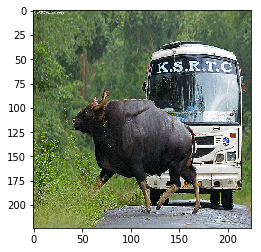

In [7]:
plt.imshow(img)

## Connecting to server

In [4]:
channel = grpc.insecure_channel("localhost:9090") 
stub = hs.PredictionServiceStub(channel)

In [5]:
model_spec = hs.ModelSpec(name="mobile_net_demo") 

## Sending image

In [20]:
tensor_shape = hs.TensorShapeProto(dim=[hs.TensorShapeProto.Dim(size=dim) for dim in img_arr.shape])
tensor = hs.TensorProto(dtype=hs.DT_DOUBLE, tensor_shape=tensor_shape, double_val=img_arr.flatten())
request = hs.PredictRequest(model_spec=model_spec, inputs={"input": tensor})
result = stub.Predict(request)

In [23]:
result.outputs.get('classes').int64_val

[346]